In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"../Dataset/Advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
X=df.drop('sales',axis=1)
y=df.sales

In [5]:
# Polynomial Features

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(X)

In [7]:
# Train_Test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [9]:
# Linear regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [11]:
# Evaluating Metrics

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2=r2_score(y_test,y_pred)

In [13]:
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R2 = ',R2)

MAE =  0.48967980448035264
MSE =  0.44175055104033295
RMSE =  0.6646431757268956
R2 =  0.9843529333146798


In [14]:
# Finding Degree Of Polynomial

In [15]:
train_rmse_errors = []
test_rmse_error = []

for d in range(1,10):
    poly=PolynomialFeatures(degree= d,include_bias= False)
    poly_features = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_error.append(test_rmse) 

In [16]:
train_rmse_errors

[1.7345941243293765,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399352,
 0.2509342974485939,
 0.20957204504223886,
 5.421812534809007,
 0.19108060365249493,
 0.17607794180475378]

In [17]:
test_rmse_error

[1.5161519375993882,
 0.6646431757268956,
 0.5803286825223335,
 0.5077742646913584,
 2.5758245447505073,
 4.370883970432224,
 1378.8992107796764,
 3388.345398597823,
 95649.82714228271]

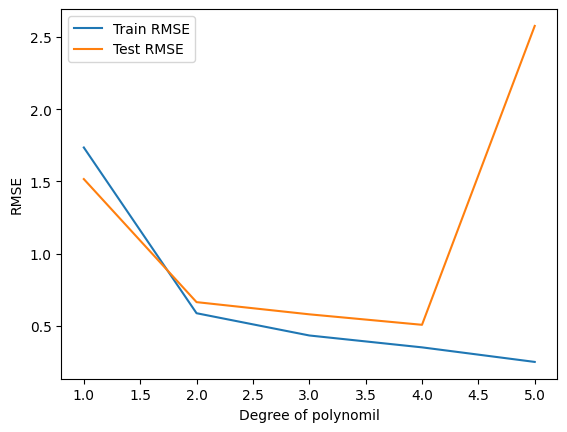

In [18]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE')
plt.plot(range(1,6),test_rmse_error[:5],label= 'Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of polynomil')
plt.legend()

In [19]:
# Polynomial Features with Optimal degree of polynomial

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4,include_bias=False)
poly_features=poly.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2=r2_score(y_test,y_pred)

In [24]:
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R2 = ',R2)

MAE =  0.39260937555885467
MSE =  0.25783470388284974
RMSE =  0.5077742646913584
R2 =  0.9908673417702735


In [25]:
# Polynomial with Scaled Features with Optimal degree of polynomial

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
poly_features=poly.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2=r2_score(y_test,y_pred)

In [37]:
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)
print('R2 = ',R2)

MAE =  0.4127516085297522
MSE =  0.3367813797507119
RMSE =  0.5803286825159617
R2 =  0.9880710036582333
